In [6]:
import os
import io

from IPython.display import Image
from google.cloud import vision

In [7]:
os.environ["PROJECT_ID"] = "text-analysis-323506"

### Create a new Google Cloud service account to access the APIs programmatically.

__Don't run the following cell if you already have setup a cloud service account and have it's associated key__.

Following command creates a Google Cloud Service account, which is required to access APIs. This command should be run only once. When ran for the first time, it create a service account, details of which can be found in IAM & Admin section of GCP console.

After that, it creates a Google Cloud Service account key got the newly created account. Key is stored at /home/jupyter directory. Download this key. Upload it the next time when this notebook is to be run again. __Following cell should not be run more than once, unless we want to create a new cloud service account__.

In [9]:
%%bash

# These should be run only once. These commands setup a cloud service account with required permissions to call APIs
gcloud iam service-accounts create my-api-sa --display-name "api account"
gcloud iam service-accounts keys create ~/key.json --iam-account my-api-sa@${PROJECT_ID}.iam.gserviceaccount.com

Created service account [my-api-sa].
created key [a7270d8b9458fd71006e4e3d8016a277fa4ed09f] of type [json] as [/home/jupyter/key.json] for [my-api-sa@text-analysis-323506.iam.gserviceaccount.com]


Following command stores path to json file in an environment variable. This is required to access API endpoints using python.

In [12]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.path.abspath("/home/jupyter/key.json")

#### Create a Google Cloud Vision api client object

In [13]:
vision_client = vision.ImageAnnotatorClient()

### Important: 
#### Enable Cloud Vision API for this project in Google Cloud Platform console.

In [45]:
# Fucntion to load an image into vision API image object
def create_image_object(path: str):
    with io.open(img_path, 'rb') as image_file:
        content = image_file.read()
        
    image_object = vision.Image(content=content)
    return image_object

## Text Detection

This API detects all kinds of texts in the queried image. 

In [40]:
img_path = './data/gsuite.jpg'

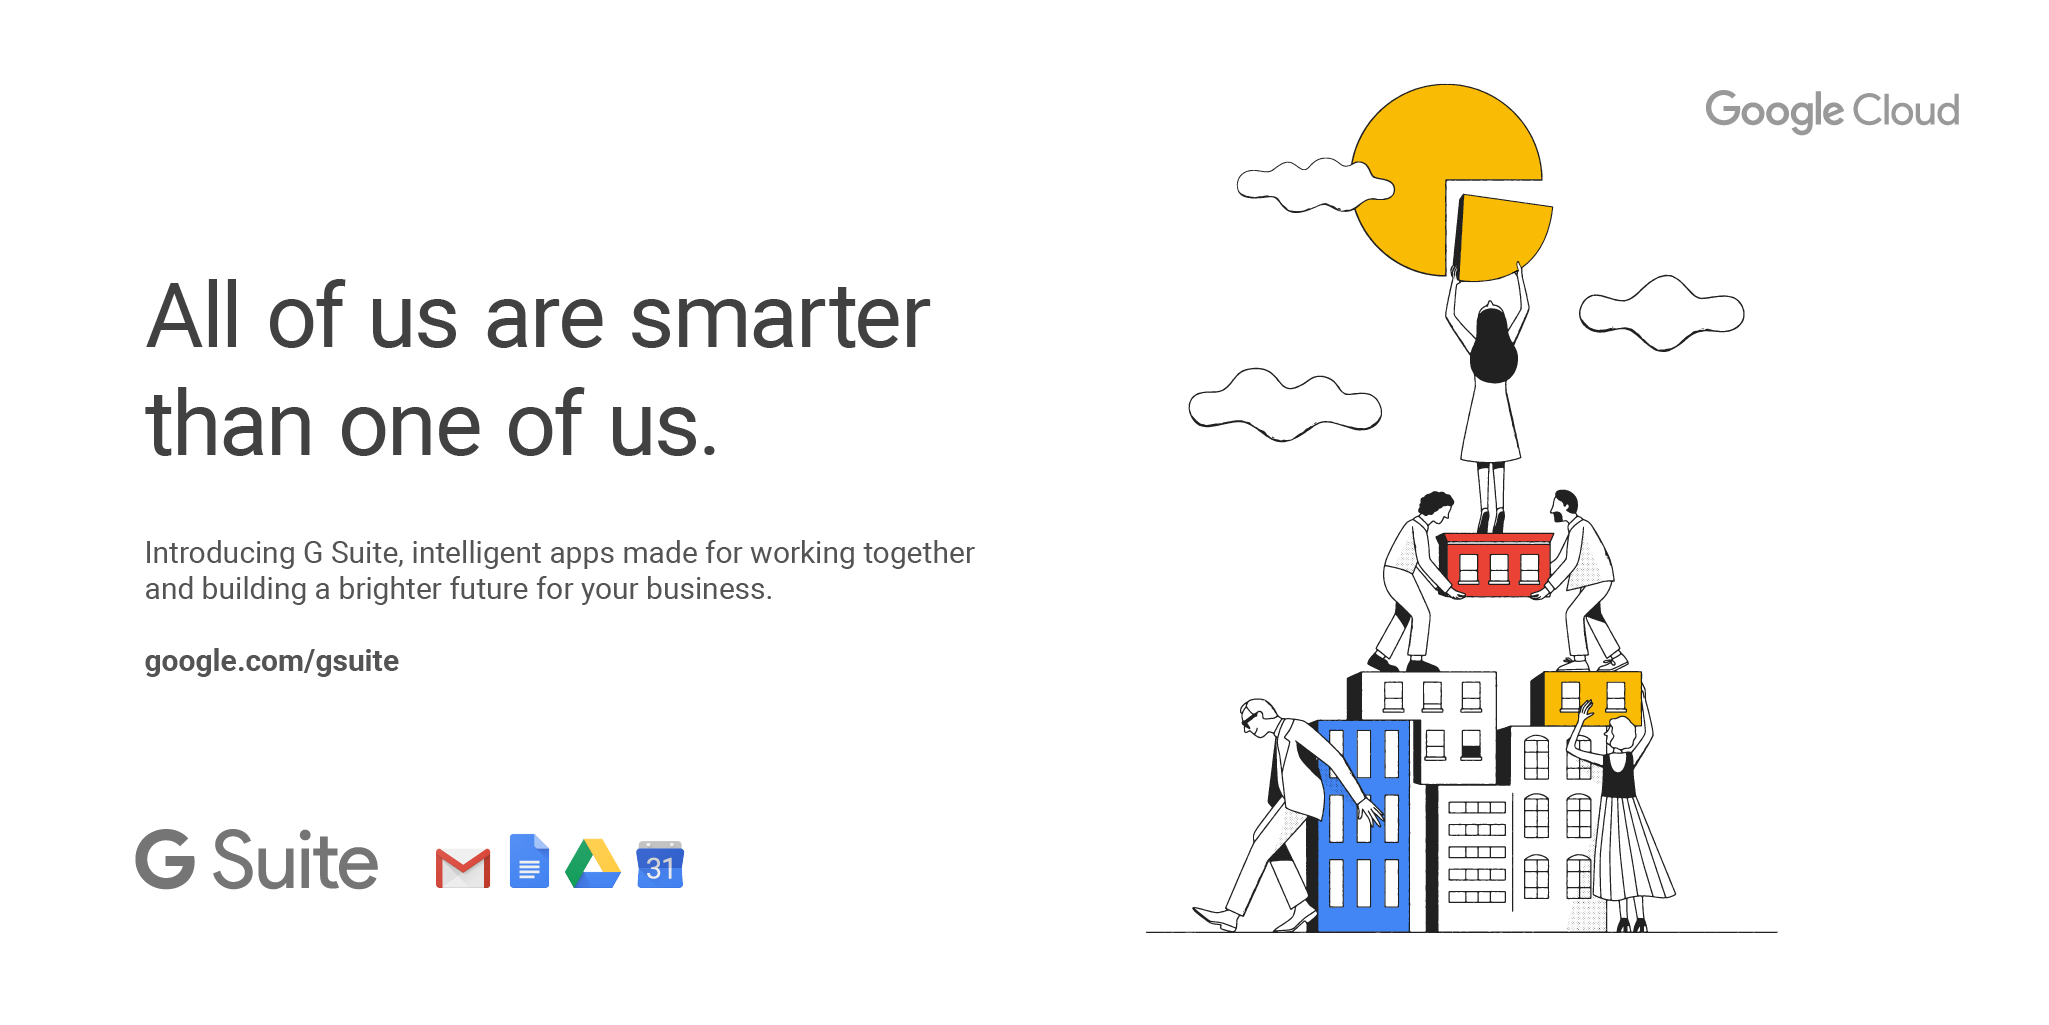

In [41]:
Image(filename=img_path, width=700, height=500) 

In [42]:
image_object = create_image_object(img_path)

In [43]:
# Send a request to cloud vision api client to detect texts in input image
response = vision_client.text_detection(image=image_object)

In [44]:
response.text_annotations[0].description.replace('\n', '\n ')

'Google Cloud\n All of us are smarter\n than one of us.\n Introducing G Suite, intelligent apps made for working together\n and building a brighter future for your business.\n google.com/gsuite\n G Suite MB AE\n h田田\n 田 田田\n '

##### As it can be seen, vision api's text_detection end point was able to detect all the texts in the image. It even added new line characters.

#### Dumping response to a text file

In [83]:
with open('./results/text_detection.txt', 'w') as fstream:
    fstream.write(str(response))

## Label Detection

Label detection APIs detects and returns a list of labels of what is in the queried image.

In [46]:
img_path = './data/dog.jpg'

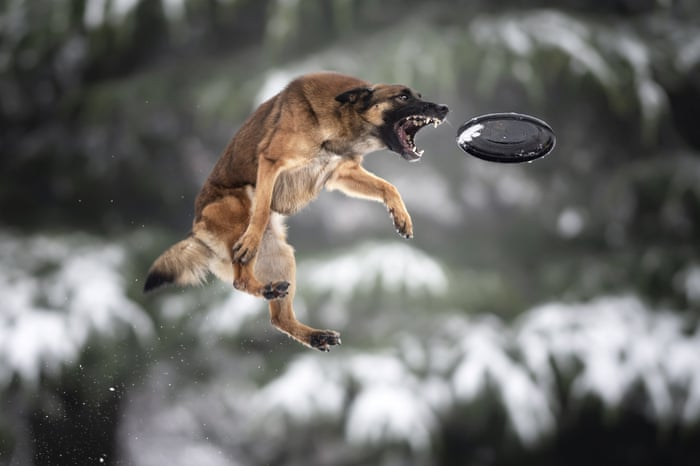

In [47]:
Image(filename=img_path, width=400, height=400) 

In [48]:
image_object = create_image_object(img_path)

In [49]:
# Send a request to cloud vision api client to detect labels in input image
response = vision_client.label_detection(image=image_object)

In [50]:
# Response with the highest confidence
print(f"Label: {response.label_annotations[0].description}, Confidence: {response.label_annotations[0].score}")

Label: Dog, Confidence: 0.9537229537963867


In [51]:
# Other responses
for responses in response.label_annotations:
    print(f"Label: {responses.description}, Confidence: {responses.score}")

Label: Dog, Confidence: 0.9537229537963867
Label: Dog breed, Confidence: 0.916549801826477
Label: Carnivore, Confidence: 0.8981429934501648
Label: Disc dog, Confidence: 0.8752760887145996
Label: Flying disc, Confidence: 0.8572475910186768
Label: Frisbee games, Confidence: 0.8473882079124451
Label: Fawn, Confidence: 0.8161194324493408
Label: Companion dog, Confidence: 0.8147051930427551
Label: Tail, Confidence: 0.7616311311721802
Label: Snout, Confidence: 0.7511301040649414


##### Vision API's label_detection returned multiple labels for the input image. And all of them make sense.

#### Dumping response to a text file

In [52]:
with open('./results/label_detection.txt', 'w') as fstream:
    fstream.write(str(response))

## Face Detection

Detects faces in the queried image. Gives co-ordinates for bounding boxes around detected faces. Also detects sentiments and much more.

In [53]:
img_path = './data/selfie.jpg'

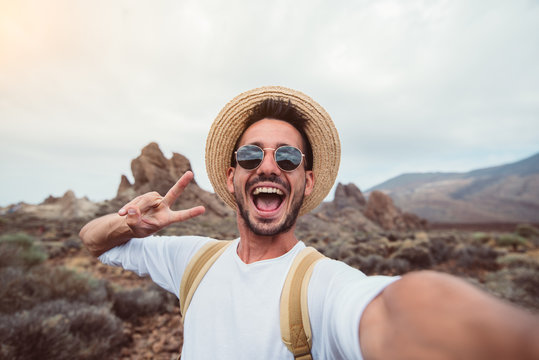

In [54]:
Image(filename=img_path, width=400, height=400) 

In [55]:
image_object = create_image_object(img_path)

In [56]:
# Send a request to cloud vision api client to detect faces in input image
response = vision_client.face_detection(image=image_object)

#### Dumping response to a text file

In [57]:
with open('./results/face_detection.txt', 'w') as fstream:
    fstream.write(str(response))

## Landmark Detection

In [58]:
img_path = './data/landmark.jpg'

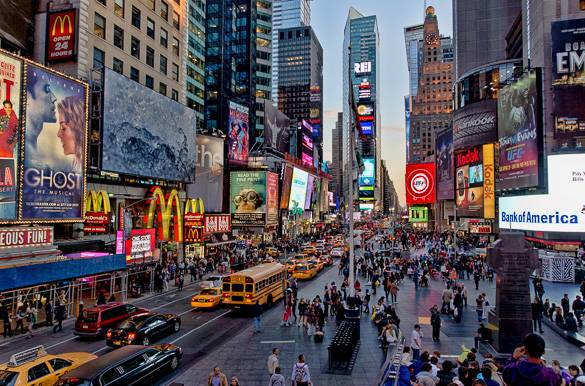

In [59]:
Image(filename=img_path, width=400, height=400) 

It's a picture of Times Square, New York 

In [60]:
image_object = create_image_object(img_path)

In [61]:
# Send a request to cloud vision api client to detect landmarks in input image
response = vision_client.landmark_detection(image=image_object)

In [62]:
print("Detected Landmark: ", response.landmark_annotations[0].description)
print("Score: ", response.landmark_annotations[0].score)

Detected Landmark:  Times Square
Score:  0.8930519819259644


##### Vision API's landmark_detection endpoint returned correct result !

#### Dumping response to a text file

In [63]:
with open('./results/landmark_detection.txt', 'w') as fstream:
    fstream.write(str(response))

## Logo Detection

Detects logos in the input image

In [64]:
img_path = './data/logos.jpg'

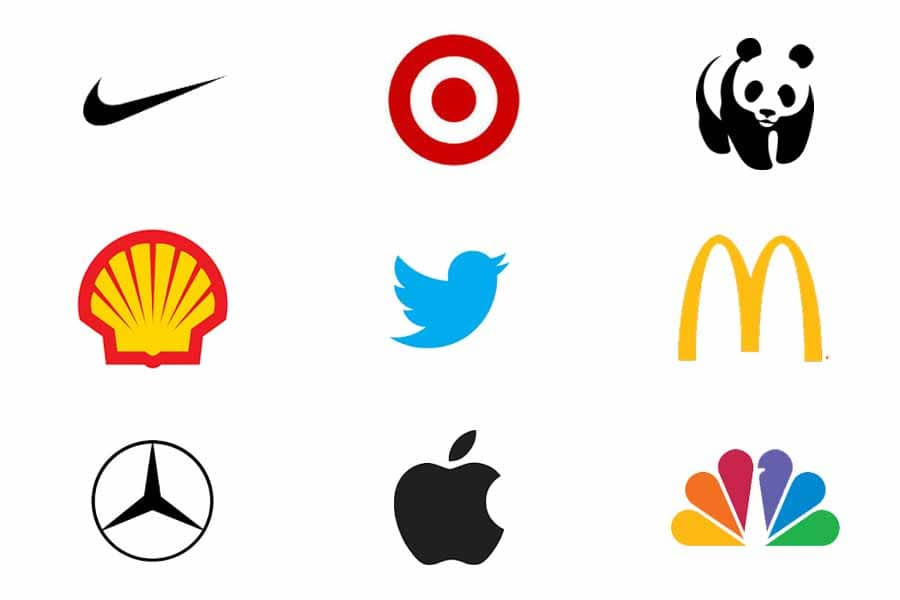

In [65]:
Image(filename=img_path, width=400, height=400) 

In [66]:
image_object = create_image_object(img_path)

In [67]:
# Send a request to cloud vision api client to detect logos in input image
response = vision_client.logo_detection(image=image_object)

In [68]:
for logo in response.logo_annotations:
    print(logo.description)

Royal Dutch Shell
Target Corporation
Nike
Apple Inc.
McDonald's
NBC News
World Wide Fund for Nature
Mercedes-Benz


#### Dumping response to a text file

In [69]:
with open('./results/logo_detection.txt', 'w') as fstream:
    fstream.write(str(response))

__logo_detection was able to detect all logos in the image. It even gives vertices to draw bounding boxes around detected logo. Find complete response in logo_detection.txt file in results folder__.

## Web Detection

This API retrievs images over the internet which are similar (fully, partially or visually) to input image. (Content Based Image Retrieval)

We will use the same dog image we used in label detection task

In [70]:
img_path = './data/dog.jpg'

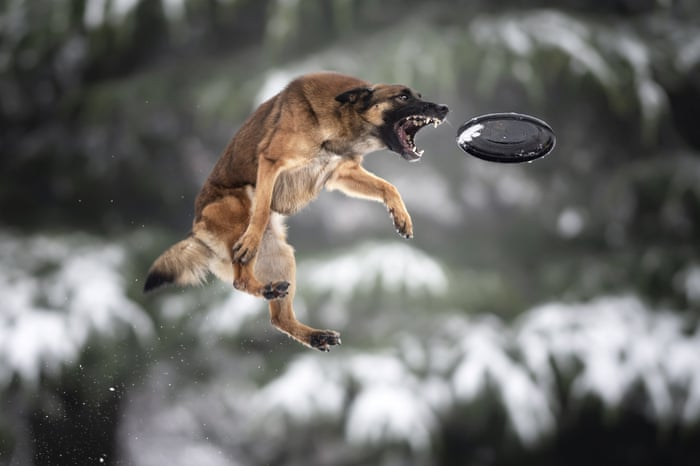

In [71]:
Image(filename=img_path, width=400, height=400) 

In [72]:
image_object = create_image_object(img_path)

In [73]:
# Send a request to cloud vision api client to detect logos in input image
response = vision_client.web_detection(image=image_object)

##### Full Matching Images

In [74]:
response.web_detection.full_matching_images 

[url: "https://n.sinaimg.cn/sinakd20108/399/w1200h799/20200819/78ba-ixvrvsp8412403.jpg"
, url: "https://krasivosti.pro/uploads/posts/2021-07/1625866524_16-krasivosti-pro-p-sobaka-v-polyote-sobaki-krasivo-foto-18.jpg"
, url: "https://cameralabs.org/media/lab19/10/29-2/fotograf-klaudio-pikkoli-6.jpg"
, url: "https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=146502367480258"
, url: "https://i.pinimg.com/originals/b1/fb/34/b1fb34fde9e0da61310f1a73d4e1de71.jpg"
, url: "https://drscdn.500px.org/photo/1010333939/q%3D80_h%3D600_of%3D1/v2?sig=e44b89d9a1d0685b420109994fe1ff677b230b366a5c46a5abd479360348cb21"
, url: "https://1.bp.blogspot.com/-nGeUlFfslaU/XdVncGu_5RI/AAAAAAAAa08/BQUf30LmIWAjIbpjsQjwlUPlzCdjtC0agCLcBGAsYHQ/s1600/Wonderful%2BPictures%2Bof%2BSuper%2BFlying%2BDogs%2Bby%2BClaudio%2BPiccoli%2B%25288%2529.jpg"
, url: "http://static.jstv.com/img/2019/10/29/201910291572328768448_75_b.jpg"
, url: "https://rs-channel.huanqiucdn.cn/imageDir/dad704462a18981e6f1d266c428fc9fbu5.jpg"

##### Partially Matching Images

In [75]:
response.web_detection.partial_matching_images

[url: "https://www.kikapress.com/wp-content/plugins/kikaplugin2/loadimageid.php?type=pod&id=5957411"
, url: "http://p3.pstatp.com/origin/pgc-image/46c480aaac0e40078c2b586b354bf719"
, url: "http://static.jstv.com/img/2019/10/29/201910291572328767450_75_b.jpg"
, url: "https://static2.55online.news/thumbnail/zhkNmZhOTM3M/vLgO7HQ152ncAYC4vUQ0VWVNX1LVNCrq1u8Hb3mD5ugCp1MIRB6dgEGTHdeDLuy2Nzr5tvFmhlvm00fmC_XgTQcGdbRSLcl2Jsc2X7R9ly47nya75GnlG391FqC0BiyG/zhkNmZhOTM3M.jpg"
, url: "http://ocdn.eu/images/pulscms/OWY7MDA_/55b440ca49f66cfea70203e352cb71ae.jpg"
, url: "https://img.wprost.pl/_thumb/7f/bc/9e9f54b3f1b21c4b3c7xx2638f9f.jpeg"
, url: "https://image.mn52.com/img/allimg/190920/8-1Z920112924.jpg"
, url: "http://5b0988e595225.cdn.sohucs.com/images/20191028/9e88a0894a1d419d8014ea5446736c2f.jpeg"
, url: "https://i1.kknews.cc/SIG=2aetbrt/ctp-vzntr/7r6pq32op89247ps916s1422n0037214.jpg"
, url: "https://static.wixstatic.com/media/40ce9a_0200a36bab4940ec88f7657937cfdd06~mv2.jpg/v1/fill/w_250,h_166,al_

##### Visually Similar Images

In [76]:
response.web_detection.visually_similar_images

[url: "https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/03144613/Greyhound-standing-stacked-outdoors.20200426001712574.jpg"
, url: "https://www.nps.gov/deto/learn/nature/images/Prairie-Dog-Jump-Yip.jpg?maxwidth=650&autorotate=false"
, url: "https://th-thumbnailer.cdn-si-edu.com/be8Bfpn0fDoerQALUuQ-ZluoIt8=/1000x750/filters:no_upscale():focal(512x385:513x386)/https://tf-cmsv2-smithsonianmag-media.s3.amazonaws.com/filer/85/78/8578258b-78dc-449c-ad11-991e20f92a3b/wolfdog.jpg"
, url: "https://www.unley.sa.gov.au/files/assets/public/pets/dog-1.jpg?w=1200"
, url: "https://i.natgeofe.com/n/ee901291-92ac-4287-b19a-8edd089f874c/3265554.jpg?w=636&h=424"
, url: "https://i.natgeofe.com/n/5ce4d5e3-4fca-4f58-bd2d-1715fea04370/5754034_16x9.jpg"
, url: "https://dt2n0xjvnpvnu.cloudfront.net/assets/product_images/img-why-dog-itching-header-m.jpg"
, url: "https://media.npr.org/assets/img/2011/01/07/istock_000013776369large_vert-3371d73492ffa1923deaac577b6e818fc6c89ae1-s1100-c50.

#### Dumping response to a text file

In [77]:
with open('./results/web_detection.txt', 'w') as fstream:
    fstream.write(str(response))

__API returns a lot of results inclusing links to pages which contain matching images. Complete response can be found in web_detection.txt file in results folder__.